In [1]:
from sklearn import datasets
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
%matplotlib inline

In [3]:
iris = datasets.load_iris()
x = pd.DataFrame(iris['data'], columns=iris['feature_names'])
print("target_names: "+str(iris['target_names']))
y = pd.DataFrame(iris['target'], columns=['target'])
iris_data = pd.concat([x,y], axis=1)
iris_data = iris_data[['sepal length (cm)','petal length (cm)','target']]
iris_data = iris_data[iris_data['target'].isin([0,1])]
iris_data.head()

target_names: ['setosa' 'versicolor' 'virginica']


,sepal length (cm),petal length (cm),target
0,5.1,1.4,0
1,4.9,1.4,0
2,4.7,1.3,0
3,4.6,1.5,0
4,5.0,1.4,0


In [4]:
from sklearn.model_selection import train_test_split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(iris_data[['sepal length (cm)','petal length (cm)']], iris_data[['target']], test_size=0.3, random_state=0)
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [7]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [8]:
lr = LogisticRegression(C=1000.0, random_state=0)
lr.fit(X_train_std, y_train['target'].values)

LogisticRegression(C=1000.0, random_state=0)

Note: you may need to restart the kernel to use updated packages.


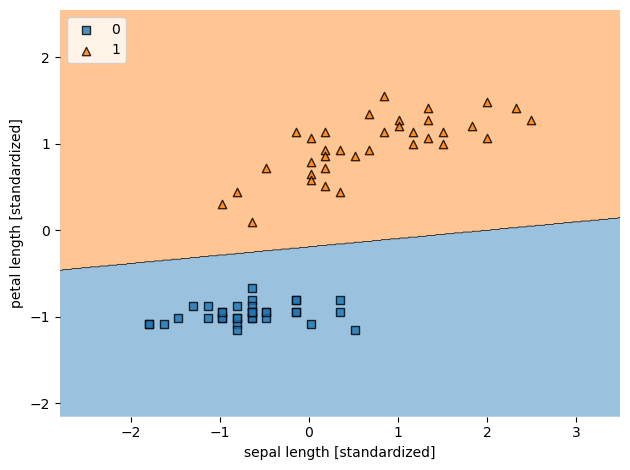

In [11]:
%pip install mlxtend

from mlxtend.plotting import plot_decision_regions

plot_decision_regions(X_train_std, y_train['target'].values, clf=lr)
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [12]:
lr.predict(X_test_std)

array([0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 1])

In [13]:
y_test['target'].values

array([0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 1])

In [14]:
error = 0
for i, v in enumerate(lr.predict(X_test_std)):
    if v != y_test['target'].values[i]:
        error += 1
print(error)

0


In [15]:
lr.predict_proba(X_test_std)

array([[9.99296336e-01, 7.03664399e-04],
       [2.71216999e-07, 9.99999729e-01],
       [9.99895710e-01, 1.04289894e-04],
       [2.13713584e-07, 9.99999786e-01],
       [2.67178468e-06, 9.99997328e-01],
       [1.14058122e-03, 9.98859419e-01],
       [9.99972208e-01, 2.77919520e-05],
       [8.72994487e-08, 9.99999913e-01],
       [4.24352905e-07, 9.99999576e-01],
       [2.54312450e-06, 9.99997457e-01],
       [9.08421262e-06, 9.99990916e-01],
       [1.60116845e-05, 9.99983988e-01],
       [3.76690614e-07, 9.99999623e-01],
       [9.99957396e-01, 4.26037999e-05],
       [9.99691663e-01, 3.08336676e-04],
       [9.98973575e-01, 1.02642474e-03],
       [9.99989412e-01, 1.05875952e-05],
       [9.87920977e-01, 1.20790235e-02],
       [9.99947475e-01, 5.25254237e-05],
       [9.99580463e-01, 4.19536925e-04],
       [9.99296336e-01, 7.03664399e-04],
       [2.33633793e-05, 9.99976637e-01],
       [9.99343737e-01, 6.56262619e-04],
       [2.82217840e-05, 9.99971778e-01],
       [9.998029